In [1]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import MobileNetV2, VGG19, DenseNet121, DenseNet169
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras import layers

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import seaborn as sns
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install imutils

In [4]:
from imutils import paths

In [5]:
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Tipe/Bersih_cobacoba 2")))

# random shuffle
random.seed(42)
random.shuffle(imagePaths)

data = []
labels = []
image_dims = (224, 224, 3)

for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (image_dims[1], image_dims[0]))
    image = img_to_array(image)
    data.append(image)
    l = label = imagePath.split(os.path.sep)[-2].split("_")
    labels.append(l)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("{} images ({:.2f}MB)".format(len(imagePaths), data.nbytes / (1024 * 1000.0)))

589 images (692.66MB)


In [6]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
)

In [7]:
data = np.array(data)
label = np.array(labels)
print(data.shape)

(589, 224, 224, 3)


In [8]:
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)
# total 4 labels
print("class labels:")
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i + 1, label))

class labels:
1. Boulder
2. Branching
3. Table


In [9]:
print(labels)

[[0 1 0]
 [0 0 1]
 [1 0 0]
 ...
 [0 1 0]
 [1 0 0]
 [1 0 0]]


In [10]:
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Tipe/Data Lapangan Bersih semua 1")))
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Tipe/Data Lapangan Bersih semua 3")))

# random shuffle
random.seed(42)
random.shuffle(imagePaths)

data2 = []
labels2 = []
image_dims = (224, 224, 3)


for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (image_dims[1], image_dims[0]))
    image = img_to_array(image)
    data2.append(image)
    l = label = imagePath.split(os.path.sep)[-2].split("_")
    labels2.append(l)

data2 = np.array(data2, dtype="float") / 255.0
labels2 = np.array(labels2)
print("{} images ({:.2f}MB)".format(len(imagePaths), data.nbytes / (1024 * 1000.0)))

data2 = np.array(data2)
label2 = np.array(labels2)
print(data2.shape)

mlb = MultiLabelBinarizer()
labels2 = mlb.fit_transform(labels2)
# total 3 labels
print("class labels:")
for (i, label2) in enumerate(mlb.classes_):
    print("{}. {}".format(i+1, label2))

testx = data2
testy = labels2


67 images (692.66MB)
(589, 224, 224, 3)
class labels:
1. Boulder
2. Branching
3. Table


In [11]:
densenet = DenseNet169(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

In [12]:
bs = 8
lr = 0.001
size = (224, 224)
shape = (224,224, 3)
epochs = 30
class_number = 3

In [13]:

def DenseNet_model(learning_rate, input_shape,class_number):
    densenet = DenseNet169(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape)

    for layer in densenet.layers[:-4]:
        layer.trainable = False

    model = Sequential()
    model.add(densenet)
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(layers.Dense(class_number, activation='softmax'))

    return model


In [14]:
model = DenseNet_model(lr,shape,class_number)
model.compile(loss= "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 average_pooling2d (AverageP  (None, 3, 3, 1664)       0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 14976)             0         
                                                                 
 dense (Dense)               (None, 1024)              15336448  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

In [16]:
trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.20)

In [26]:
print(trainX.shape,trainY.shape,testX.shape,testY.shape,testx.shape,testy.shape)

(471, 224, 224, 3) (471, 3) (118, 224, 224, 3) (118, 3) (67, 224, 224, 3) (67, 3)


In [18]:
# print("[INFO] training ...")
# H = model.fit(aug.flow(trainX, trainY, batch_size=bs),steps_per_epoch=len(trainX) // bs,	epochs=epochs)

In [19]:
print("[INFO] training ...")
H = model.fit(aug.flow(trainX, trainY, batch_size=bs),steps_per_epoch=len(trainX) // bs,	validation_data=(testX, testY),	validation_steps=len(testX) // bs,	epochs=epochs)

[INFO] training ...
Epoch 1/30
58/58 [==============================] - 48s 308ms/step - loss: 4.2953 - accuracy: 0.6328 - val_loss: 0.2644 - val_accuracy: 0.9153
Epoch 2/30
58/58 [==============================] - 7s 114ms/step - loss: 0.6002 - accuracy: 0.8294 - val_loss: 0.1354 - val_accuracy: 0.9576
Epoch 3/30
58/58 [==============================] - 8s 145ms/step - loss: 0.3063 - accuracy: 0.8942 - val_loss: 0.1256 - val_accuracy: 0.9576
Epoch 4/30
58/58 [==============================] - 6s 111ms/step - loss: 0.3086 - accuracy: 0.8834 - val_loss: 0.1100 - val_accuracy: 0.9576
Epoch 5/30
58/58 [==============================] - 17s 294ms/step - loss: 0.2804 - accuracy: 0.9222 - val_loss: 0.0954 - val_accuracy: 0.9661
Epoch 6/30
58/58 [==============================] - 16s 269ms/step - loss: 0.3174 - accuracy: 0.9136 - val_loss: 0.1415 - val_accuracy: 0.9492
Epoch 7/30
58/58 [==============================] - 7s 121ms/step - loss: 0.2762 - accuracy: 0.9071 - val_loss: 0.2013 - val_

In [20]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testx, batch_size=bs)
y_predict =predIdxs
# for each image in the testing set we need to find the index of the label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testy.argmax(axis=1), predIdxs,target_names=mlb.classes_))

[INFO] evaluating network...
9/9 [==============================] - 5s 269ms/step
              precision    recall  f1-score   support

     Boulder       1.00      0.96      0.98        27
   Branching       0.90      0.93      0.92        30
       Table       0.80      0.80      0.80        10

    accuracy                           0.93        67
   macro avg       0.90      0.90      0.90        67
weighted avg       0.93      0.93      0.93        67



In [21]:
# print("[INFO] evaluating network...")
# predIdxs = model.predict(testX, batch_size=bs)
# y_predict =predIdxs
# # for each image in the testing set we need to find the index of the label with corresponding largest predicted probability
# predIdxs = np.argmax(predIdxs, axis=1)

# # show a nicely formatted classification report
# print(classification_report(testY.argmax(axis=1), predIdxs,target_names=mlb.classes_))

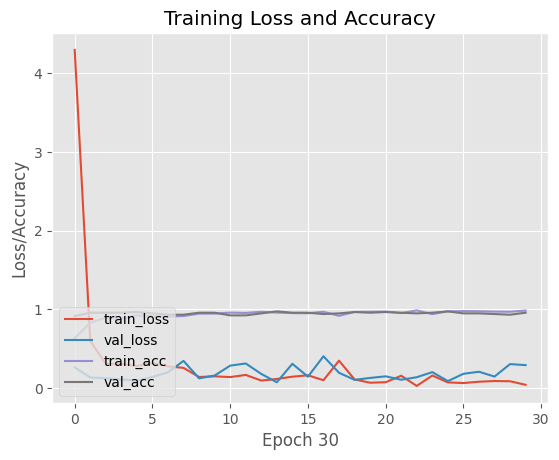

In [22]:
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch 30")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [ ]:
# # Pembuatan Confusion Matrix Display
# cmd= metrics.confusion_matrix(testY.argmax(axis=1), np.argmax(y_predict, axis=1))
# display_label = ['Boulder','Branching','Table']

# cm_lr= ConfusionMatrixDisplay(cmd, display_labels = display_label )
# cm_lr.plot(cmap=plt.cm.RdPu)
# plt.grid(False)
# plt.title("Confusion Matrix Display")

# plt.show()

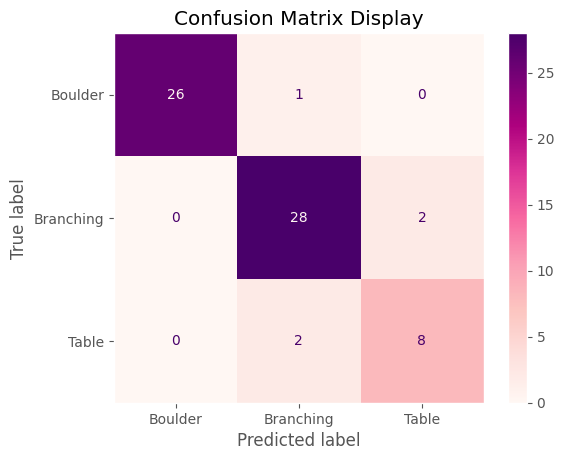

In [23]:
# Pembuatan Confusion Matrix Display
cmd= metrics.confusion_matrix(testy.argmax(axis=1), np.argmax(y_predict, axis=1))
display_label = ['Boulder','Branching','Table']

cm_lr= ConfusionMatrixDisplay(cmd, display_labels = display_label )
cm_lr.plot(cmap=plt.cm.RdPu)
plt.grid(False)
plt.title("Confusion Matrix Display")

plt.show()

In [27]:
# model.save('/content/drive/MyDrive/Skripsi/Program CNN/DenseNet/Saved Model/new_densenet169_30_tipe_model_6.h5')

In [29]:
# with open('/content/drive/MyDrive/Skripsi/Program CNN/DenseNet/Saved History Model/new_densenet169_H_30_tipe_6', 'wb') as file_pi:
#     pickle.dump(H.history, file_pi)